# Internet en maatschappij

Stan Bakker (15840530), Thijn Poland (14947854), Oliver Martin (15827488) en Sebastian Rociu (15617084)

Groepsnummer: Groep C2 (#8)

In [1]:
# Load image from link
url = 'https://hips.hearstapps.com/hmg-prod/images/global-communication-network-royalty-free-image-1668526356.jpg?crop=1xw:0.84415xh;center,top&resize=1200:*'

from IPython.display import Image, display
width = 600
height = 300
subtitle = "© YUICHIRO CHINO//GETTY IMAGES"
image = Image(url=url, width=width, height=height)
display(image)
print(subtitle)

© YUICHIRO CHINO//GETTY IMAGES


## Introduction

De opkomst van internet heeft de wereld fundamenteel veranderd. Sinds 2005 is het aantal mensen met internettoegang wereldwijd enorm toegenomen (World Bank, 2023). Deze digitale groei beïnvloedt niet alleen hoe mensen communiceren en informatie uitwisselen, maar heeft ook bredere gevolgen voor het welzijn van individuen en de economische prestaties van landen (Helliwell et al., 2021).

In dit project onderzoeken we de relatie tussen internetadoptie, geluk en economische indicatoren zoals bbp-groei en werkloosheid. We combineren meerdere datasets om inzicht te krijgen in hoe internettoegang samenhangt met sociale steun, vrijgevigheid en economische trends (Islam, 2023; Mirhajisadati, 2023; Sudip, 2023).

We benaderen dit vanuit twee perspectieven: internet als drijvende kracht achter groei en verbondenheid, versus internet als veroorzaker van ongelijkheid, burn-out en economische verschuivingen. Door deze perspectieven visueel te onderbouwen met data, willen we op een toegankelijke manier laten zien hoe internet bijdraagt aan of juist afbreuk doet aan levenskwaliteit en economische veerkracht wereldwijd.


## Perspectief 1: Internet draagt bij aan economische groei en sociaal welzijn

**Argument 1.1:** In landen met een hoge internetpenetratie is gemiddeld ook sprake van hogere economische groei. Digitale infrastructuur maakt het eenvoudiger om te werken, te leren en te ondernemen, wat de productiviteit en het bbp ten goede komt.

**Argument 1.2:** Meer toegang tot internet vergroot de sociale verbondenheid.
Dit draagt bij aan hogere scores op sociale steun en vrijgevigheid, zoals zichtbaar in verschillende visualisaties uit het World Happiness Report.

## Perspectief 2: Digitalisering leidt niet automatisch tot geluk of economische verbetering

**Argument 2.1:** In sommige landen stijgt zowel internetpenetratie als werkloosheid, wat suggereert dat digitale vooruitgang ook kan samengaan met economische kwetsbaarheid of verdringing van arbeid.

**Argument 2.2:** Niet overal leidt internettoegang tot meer geluk of verbondenheid. In meerdere landen is er nauwelijks correlatie tussen digitalisering en factoren zoals vrijgevigheid of sociale steun, wat erop wijst dat andere sociaal-economische factoren zwaarder wegen.

## Dataset and Preprocessing

In [2]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})

INTERNET_CSV  = "global_internet_adoption_monthly_2010_2025.csv"
ECON_CSV      = "economic_indicators_dataset_2010_2023.csv"
HAPPY_CSV     = "World Happiness Report 2005-2021.csv"

internet_df  = pd.read_csv(INTERNET_CSV)
econ_df      = pd.read_csv(ECON_CSV)
happiness_df = pd.read_csv(HAPPY_CSV)

country_fix = {"USA": "United States"}
for df in [internet_df, econ_df, happiness_df]:
    col = next(c for c in df.columns if "Country" in c)
    df[col] = df[col].replace(country_fix)
    df.rename(columns={col: "Country"}, inplace=True)

for df in [internet_df, econ_df]:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df["Year"] = df["Date"].dt.year

internet_avg_10_21 = (
    internet_df.query("2010 <= Year <= 2021")
               .groupby("Country")["Internet_Penetration (%)"]
               .mean().rename("Internet (%)")
               .reset_index()
)
gdp_avg_10_21 = (
    econ_df.query("2010 <= Year <= 2021")
           .groupby("Country")["GDP Growth Rate (%)"]
           .mean().rename("GDP growth (%)")
           .reset_index()
)
combined_internet_gdp = internet_avg_10_21.merge(gdp_avg_10_21, on="Country")

internet_yearly   = (internet_df.groupby("Year")["Internet_Penetration (%)"]
                                .mean().reset_index())
unemp_yearly      = (econ_df.groupby("Year")["Unemployment Rate (%)"]
                                .mean().reset_index())
merged_yearly     = internet_yearly.merge(unemp_yearly, on="Year")

internet_by_cty_yr = (internet_df.groupby(["Country", "Year"])
                                   ["Internet_Penetration (%)"]
                                   .mean().reset_index())
happiness_df["Social support"] *= 100        # naar 0-100 schaal
support_by_cty_yr = (happiness_df.groupby(["Country", "Year"])
                                   ["Social support"]
                                   .mean().reset_index())
generosity_by_cty_yr = (happiness_df.groupby(["Country", "Year"])
                                       ["Generosity"]
                                       .mean().reset_index())

internet_support = internet_by_cty_yr.merge(support_by_cty_yr, on=["Country", "Year"])
internet_generos = internet_by_cty_yr.merge(generosity_by_cty_yr, on=["Country", "Year"])

growth_2010_2023 = (
    internet_by_cty_yr.pivot(index="Country", columns="Year",
                             values="Internet_Penetration (%)")
                      .dropna(subset=[2010, 2023])
)
growth_2010_2023["Growth (%)"] = growth_2010_2023[2023] - growth_2010_2023[2010]
growth_df = growth_2010_2023[["Growth (%)"]].reset_index()

unemp_cty_mean = (econ_df.query("2010 <= Year <= 2023")
                          .groupby("Country")["Unemployment Rate (%)"]
                          .mean().reset_index())
growth_unemp = unemp_cty_mean.merge(growth_df, on="Country")

DATA = dict(
    internet_df=internet_df,
    econ_df=econ_df,
    happiness_df=happiness_df,
    combined_internet_gdp=combined_internet_gdp,
    merged_yearly=merged_yearly,
    internet_support=internet_support,
    internet_generos=internet_generos,
    growth_unemp=growth_unemp
)

Voor dit project maken we gebruik van drie afzonderlijke datasets die elk een ander aspect van onze onderzoeksvraag ondersteunen: internettoegang, welzijn en economische ontwikkeling. De specifieke inhoud en structuur van deze datasets zijn verderop afzonderlijk toegelicht.

De datasets zijn ingelezen in Python met behulp van pandas. Om consistente vergelijkingen over tijd te kunnen maken, zijn datumkolommen geconverteerd naar jaartallen en is data geaggregeerd op jaarbasis. Daarnaast is missing data gecontroleerd en waar nodig verwijderd of genegeerd om vertekende resultaten te voorkomen.

Na het opschonen zijn de datasets op basis van landen en jaren samengevoegd, zodat relaties tussen variabelen (zoals internetpenetratie en werkloosheid) over tijd geanalyseerd konden worden. Dit preprocessingproces maakte het mogelijk om gecombineerde visualisaties te maken waarin meerdere indicatoren uit verschillende bronnen overzichtelijk worden weergegeven.
Door deze aanpak kunnen we onderzoeken hoe internettoegang samenhangt met sociaal economische indicatoren zoals geluk, vrijgevigheid en economische veerkracht. De specifieke kenmerken van elke dataset zijn hieronder in detail beschreven.

### Dataset 1: Global Internet Adoption Trends (2010–2025)

URL: https://www.kaggle.com/datasets/sudipde25/global-internet-adoption-trends

Bestand: global_internet_adoption_monthly_2010_2025.csv

Uitleg:
Deze dataset bevat maandelijks bijgewerkte gegevens over wereldwijde internettoegang, breedbandsnelheid, mobiel dataverbruik en opleidingsniveau tussen 2010 en 2025 (Sudip, 2023). De gegevens zijn per land en per regio (stedelijk/plattelands) uitgesplitst.

Variabelen:

**Nominaal**: Country, Region

**Ratio (continu)**: Internet_Penetration (%), Broadband_Speed (Mbps), Education_Level (%), Mobile_Data_Usage (GB), Digital_Investment (%), GDP_per_Capita

### Dataset 2: World Happiness Report 2005–2021
URL: https://www.kaggle.com/datasets/jahaidulislam/world-happiness-report-2005-2021

Bestand: World Happiness Report 2005-2021.csv

Uitleg:
Deze dataset bevat gegevens over geluk per land per jaar op basis van wereldwijde enquêtes uitgevoerd door Gallup, en gepubliceerd door onder andere het Wellbeing Research Centre en SDSN (Helliwell et al., 2021; Islam, 2023).

Variabelen:

**Nominaal**: Country name, Region

**Ratio (continu)**: Ladder score, Social support, Generosity, GDP per capita, Freedom to make life choices, Perceptions of corruption

### Dataset 3: Global Economic Indicators (2010–2023)
URL: https://www.kaggle.com/datasets/heidarmirhajisadati/global-economic-indicators-dataset-2010-2023

Bestand: economic_indicators_dataset_2010_2023.csv

Uitleg:
Deze dataset verzamelt economische indicatoren zoals bbp-groei, inflatie, werkloosheid en overheidsuitgaven per land van 2010 tot 2023. De gegevens zijn afkomstig van internationale bronnen en geaggregeerd door de dataset-auteur (Mirhajisadati, 2023).

Variabelen:

**Nominaal**: Country

**Interval**: Date

**Ratio (continu)**: GDP Growth Rate (%), Unemployment Rate (%), Inflation Rate (%), Government Spending (%), Exchange Rate, Debt Ratio (%)

## Internet als motor van vooruitgang

Internet speelt een steeds grotere rol in het dagelijks leven en kan bijdragen aan zowel economische groei als meer geluk onder de bevolking. Met name in landen waar digitale infrastructuur sterk is ontwikkeld, lijkt internettoegang samen te hangen met een hogere levenskwaliteit. In dit perspectief onderzoeken we hoe internetfuncties zoals toegang tot informatie, digitale dienstverlening en online communicatie bijdragen aan economische vooruitgang én sociale verbondenheid.

### Argument 1: Digitale toegang bevordert economische groei

Figuur 1 laat zien hoe internetpenetratie en bbp-groei zich tussen 2010 en 2021 per land tot elkaar verhouden. In deze vergelijking vallen vooral Duitsland en de Verenigde Staten op: landen met een relatief hoge internetpenetratie én een stabiele economische groei. China combineert eveneens een sterke bbp-groei met een toenemende digitale infrastructuur.

Aan de andere kant zien we dat landen als India en Brazilië, met een lagere gemiddelde internetpenetratie, ook iets gematigder economische groei tonen. Deze visuele relatie versterkt het idee dat goede digitale toegang samenhangt met bredere economische ontwikkeling: hoe beter de bevolking online is aangesloten, hoe groter de kansen op werk, innovatie en productiviteit.

De correlation coëfficient tussen de variabelen internet penetration en GDP growth rate voor de desbetreffende landen is -0.411. Dit is een redelijk hoge correlatie wat betekend dat een groot deel van de landen samen met het groeien van een GDP ook meer toegang krijgt tot internet. Dit is ook te zien op de heat map waarbij een deel van de landen een redelijk hoge correlatie heeft (China en India) en het andere deel bijna niet (De VS en Brazilië).

In [3]:
correlation = DATA["combined_internet_gdp"]["Internet (%)"] \
    .corr(DATA["combined_internet_gdp"]["GDP growth (%)"])
print(f"Correlatie internetpenetratie ↔ BBP-groei: {correlation:.3f}")

fig_internet = px.choropleth(
    DATA["combined_internet_gdp"], locations="Country", locationmode="country names",
    color="Internet (%)", hover_data={"Internet (%)":':.1f',"GDP growth (%)":':.2f'},
    color_continuous_scale="YlOrRd",
    title="Internetpenetratie per land (gemiddeld 2010-2021)"
).update_geos(projection_type="natural earth")
fig_internet.update_layout(margin=dict(r=0, l=0, t=50, b=0), height=400)
fig_internet.show()

fig_gdp = px.choropleth(
    DATA["combined_internet_gdp"], locations="Country", locationmode="country names",
    color="GDP growth (%)", hover_data={"GDP growth (%)":':.2f',"Internet (%)":':.1f'},
    color_continuous_scale="PuBuGn",
    title="BBP-groei per land (gemiddeld 2010-2021)"
).update_geos(projection_type="natural earth")
fig_gdp.update_layout(margin=dict(r=0, l=0, t=50, b=0), height=400)
fig_gdp.show()

Correlatie internetpenetratie ↔ BBP-groei: -0.411


> *Figuur 1.1 en 1.2: Vergelijking van internetpenetratie en bbp-groei per land tussen 2010 en 2021.*

Figuur 1.1 toont een spreidingsdiagram van de gemiddelde internetpenetratie ten opzichte van de gemiddelde bbp-groei per land tussen 2010 en 2021 (Figuur 1.2). Hieruit blijkt dat landen met een hoge internetpenetratie over het algemeen ook een hogere economische groei kennen. Zo zijn er duidelijke clusters zichtbaar van landen met zowel hoge penetratiepercentages als positieve bbp-groeicijfers. Dit wijst op een mogelijke positieve samenhang tussen digitale toegankelijkheid en economische prestaties. Hoewel het geen bewijs levert voor een causaal verband, ondersteunt het de hypothese dat een goed ontwikkelde digitale infrastructuur samengaat met gunstige macro-economische omstandigheden.

In Figuur 2 hieronder is te zien hoe de gemiddelde internetpenetratie en de werkloosheid zich ontwikkelen over de periode 2010 tot 2023. De grafiek laat zien dat internetpenetratie vrijwel continu stijgt, terwijl de werkloosheid per jaar meer fluctueert. Wat opvalt is dat tussen 2016 en 2022 beide variabelen een stijgende lijn volgen. De correlatiecoëfficiënt tussen Internet_Penetration (%) en Unemployment Rate (%) is -0,230. Dit duidt op een zwakke negatieve correlatie, maar laat wel enige samenhang zien. In de genoemde periode lijkt er dus sprake van een gedeelde trend, wat suggereert dat digitalisering en arbeidsmarktontwikkelingen in bepaalde contexten elkaar beïnvloeden. Toch geldt dit niet voor alle jaren, waardoor voorzichtigheid geboden is bij het trekken van harde conclusies.

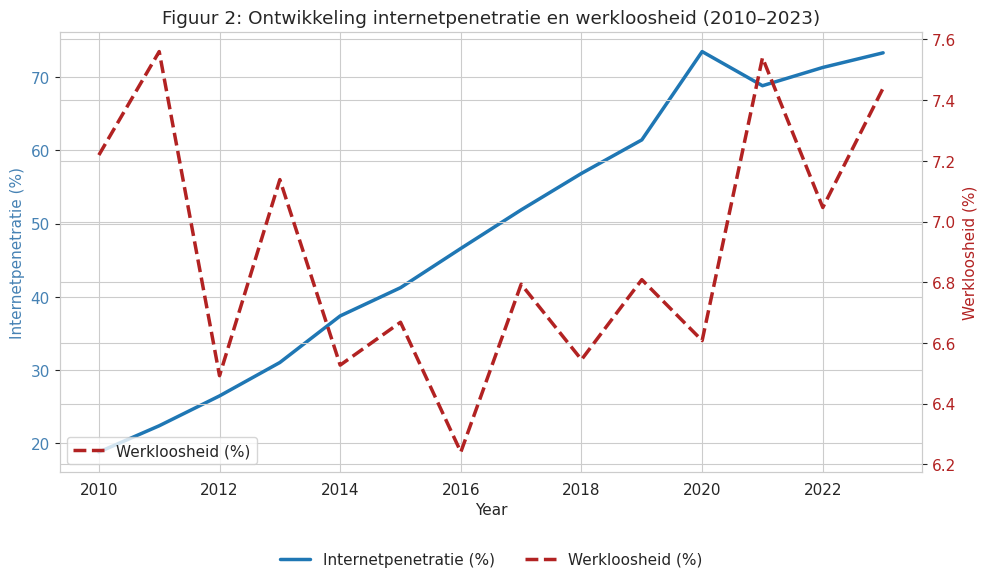

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=DATA["merged_yearly"], x="Year", y="Internet_Penetration (%)",
             ax=ax1, label="Internetpenetratie (%)", linewidth=2.5)
ax1.set_ylabel("Internetpenetratie (%)", color="steelblue")
ax1.tick_params(axis='y', labelcolor="steelblue")

ax2 = ax1.twinx()
sns.lineplot(data=DATA["merged_yearly"], x="Year", y="Unemployment Rate (%)",
             ax=ax2, label="Werkloosheid (%)", linestyle="--",
             linewidth=2.5, color="firebrick")
ax2.set_ylabel("Werkloosheid (%)", color="firebrick")
ax2.tick_params(axis='y', labelcolor="firebrick")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, loc="upper center",
           bbox_to_anchor=(0.5,-0.15), ncol=2, frameon=False)

plt.title("Figuur 2: Ontwikkeling internetpenetratie en werkloosheid (2010–2023)")
fig.tight_layout()
plt.show()

> *Figuur 2: Lijngrafiek van internetpenetratie tegenover werkloosheidscijfers over tijd.*

### Argument 2: Meer verbondenheid leidt tot meer welzijn

Behalve economische groei, draagt internettoegang ook bij aan sociaal welzijn. Door verbonden te zijn met anderen (zowel lokaal als internationaal) kunnen mensen steun vinden, sociale netwerken onderhouden en zich onderdeel voelen van een gemeenschap. Dit gevoel van verbondenheid is zichtbaar in de scores van ‘social support’ in het World Happiness Report, die vaak hoger zijn in landen met goede internettoegang.

De correlation coëfficient tussen internet penetration en de social support is 0.13943726856529323. Het gaat hier om de correlatie tussen de gemiddelde toegang tot internet in een land en de sociale support die men voelt in een samenleving (onderdeel van de happiness dataset). Deze correlation coëfficient is aan de lage kant wat ook terug is te zien in Figuur 3. Hoewel er landen zijn waar de correlatie hoog is (Ethiopië en China), is er tussen de overige landen (bijna) geen correlatie te vinden tussen de toegang tot internet en de sociale support.

Correlatie wereldwijd: 0.139


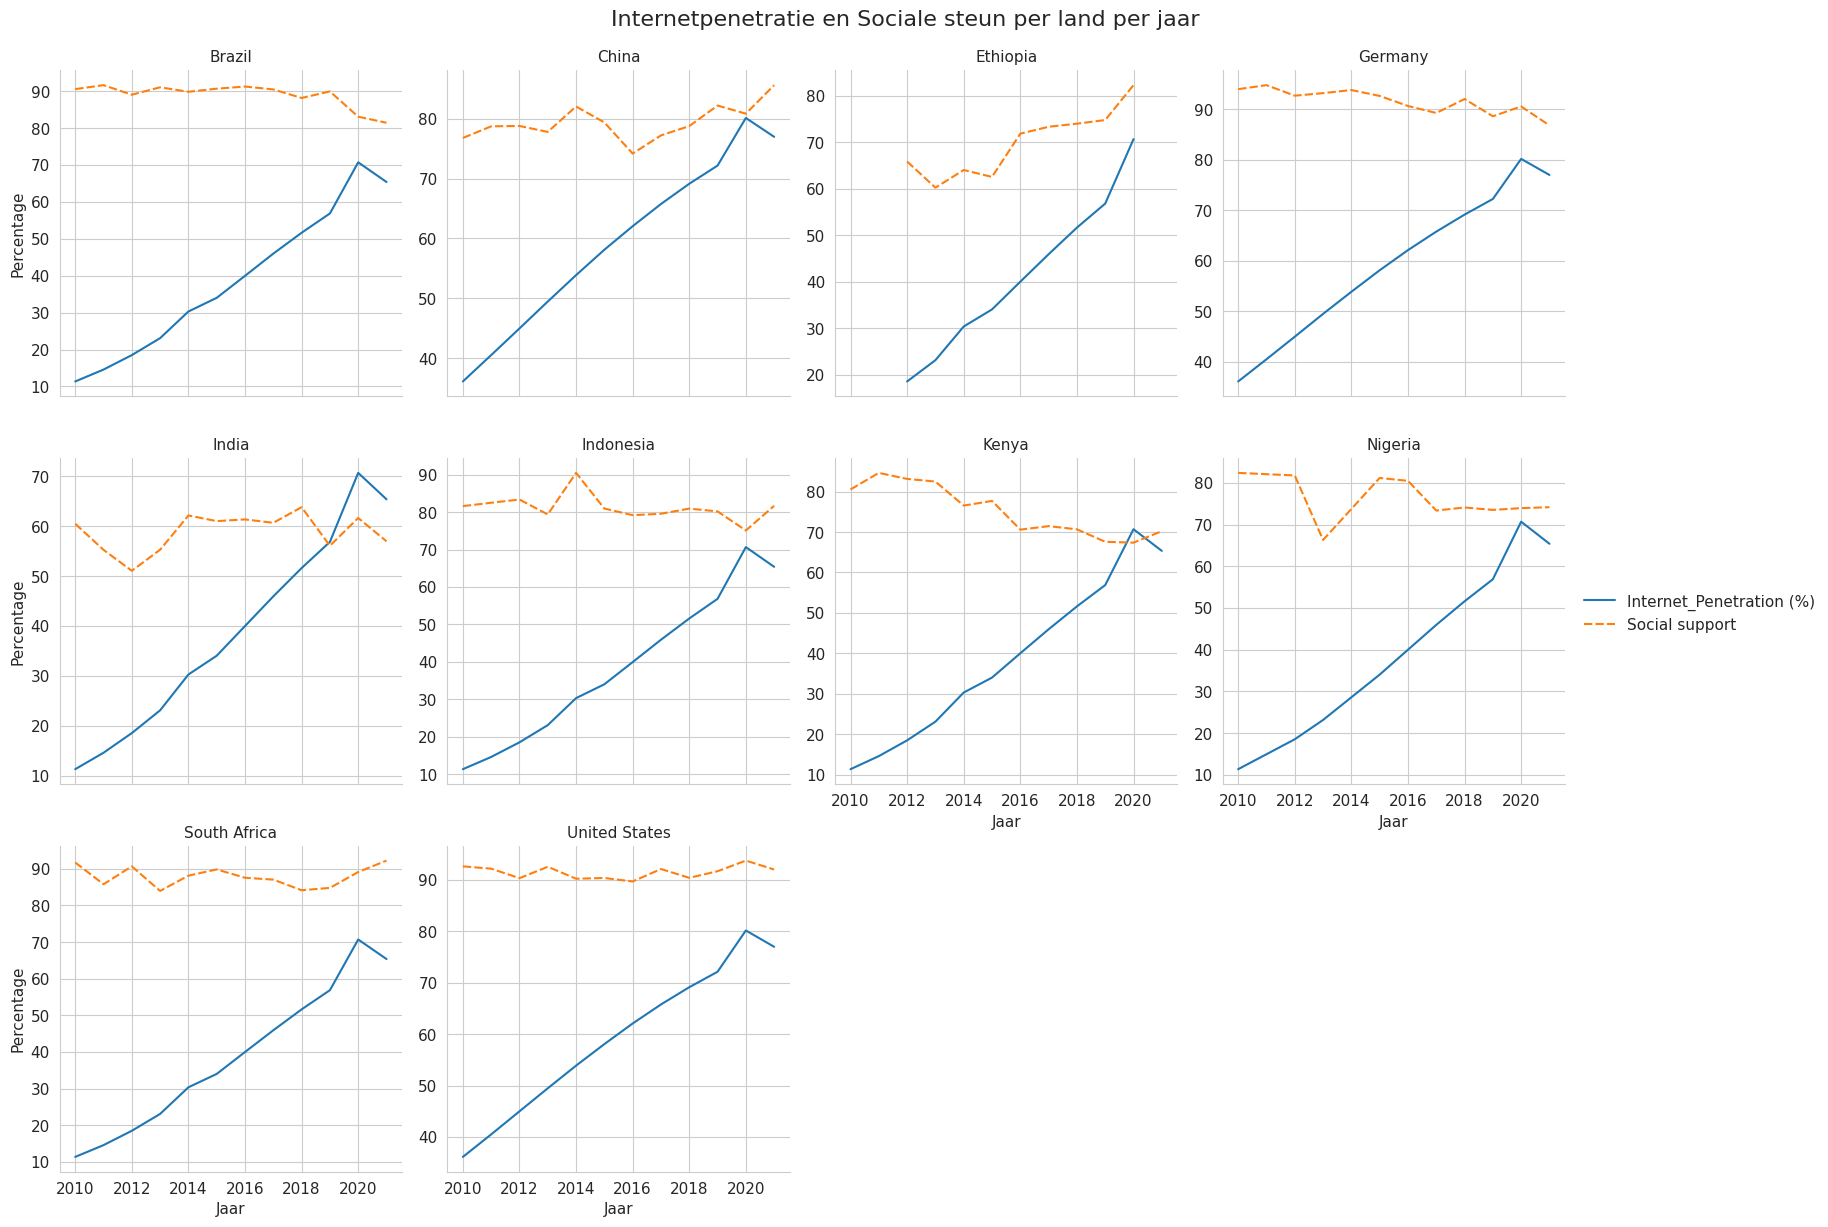

In [5]:
df = DATA["internet_support"]

valid_cty = df.groupby("Country").filter(lambda x: len(x) >= 5)
corr = valid_cty["Internet_Penetration (%)"].corr(valid_cty["Social support"])
print(f"Correlatie wereldwijd: {corr:.3f}")

plot_df = valid_cty.melt(
    id_vars=["Country", "Year"],
    value_vars=["Internet_Penetration (%)", "Social support"],
    var_name="Metric", value_name="Value"
)

g = sns.FacetGrid(plot_df, col="Country", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="Value", hue="Metric", style="Metric")
g.add_legend(); g.set_axis_labels("Jaar", "Percentage"); g.set_titles("{col_name}")
g.fig.suptitle("Internetpenetratie en Sociale steun per land per jaar", fontsize=16, y=1.02)
plt.show()

> *Figuur 3: Lijngrafiek van internetpenetratie en gemiddelde social support-score per regio.*

Figuur 3 laat per land de jaarlijkse ontwikkeling zien van internetpenetratie en social support. In veel gevallen is te zien dat beide variabelen een vergelijkbaar stijgende lijn volgen. Dit duidt erop dat toegang tot internet mogelijk bijdraagt aan het versterken van sociale netwerken en het gevoel van verbondenheid. Vooral in landen met sterke digitale groei, zoals Estland en Chili, is ook een duidelijke toename in sociale steun zichtbaar. De figuur suggereert dat internettoegang sociale voordelen kan bieden, hoewel het verband niet in elk land even sterk aanwezig is.

De correlatiecoëfficiënt tussen vrijgevigheid en internet penetratie is -0.10792912762708827. Dit betekent dat er gemiddeld gezien weinig correlatie is tussen de vrijgevigheid in een samenleving en de hoeveelheid toegang tot internet. Dit is ook terug te zien in Figuur 4 waarbij voor de meeste landen geldt dat een hoge internetpenetratie niet samengaat met meer vrijgevigheid in een land (zie Indonesië, Kenia, Negeria, Ethiopië, Duitsland en China). Bij andere landen (India, Brazilië, Zuid-Afrika en de VS) een minder lage correlatie te zien is.

Correlatie wereldwijd: 0.033


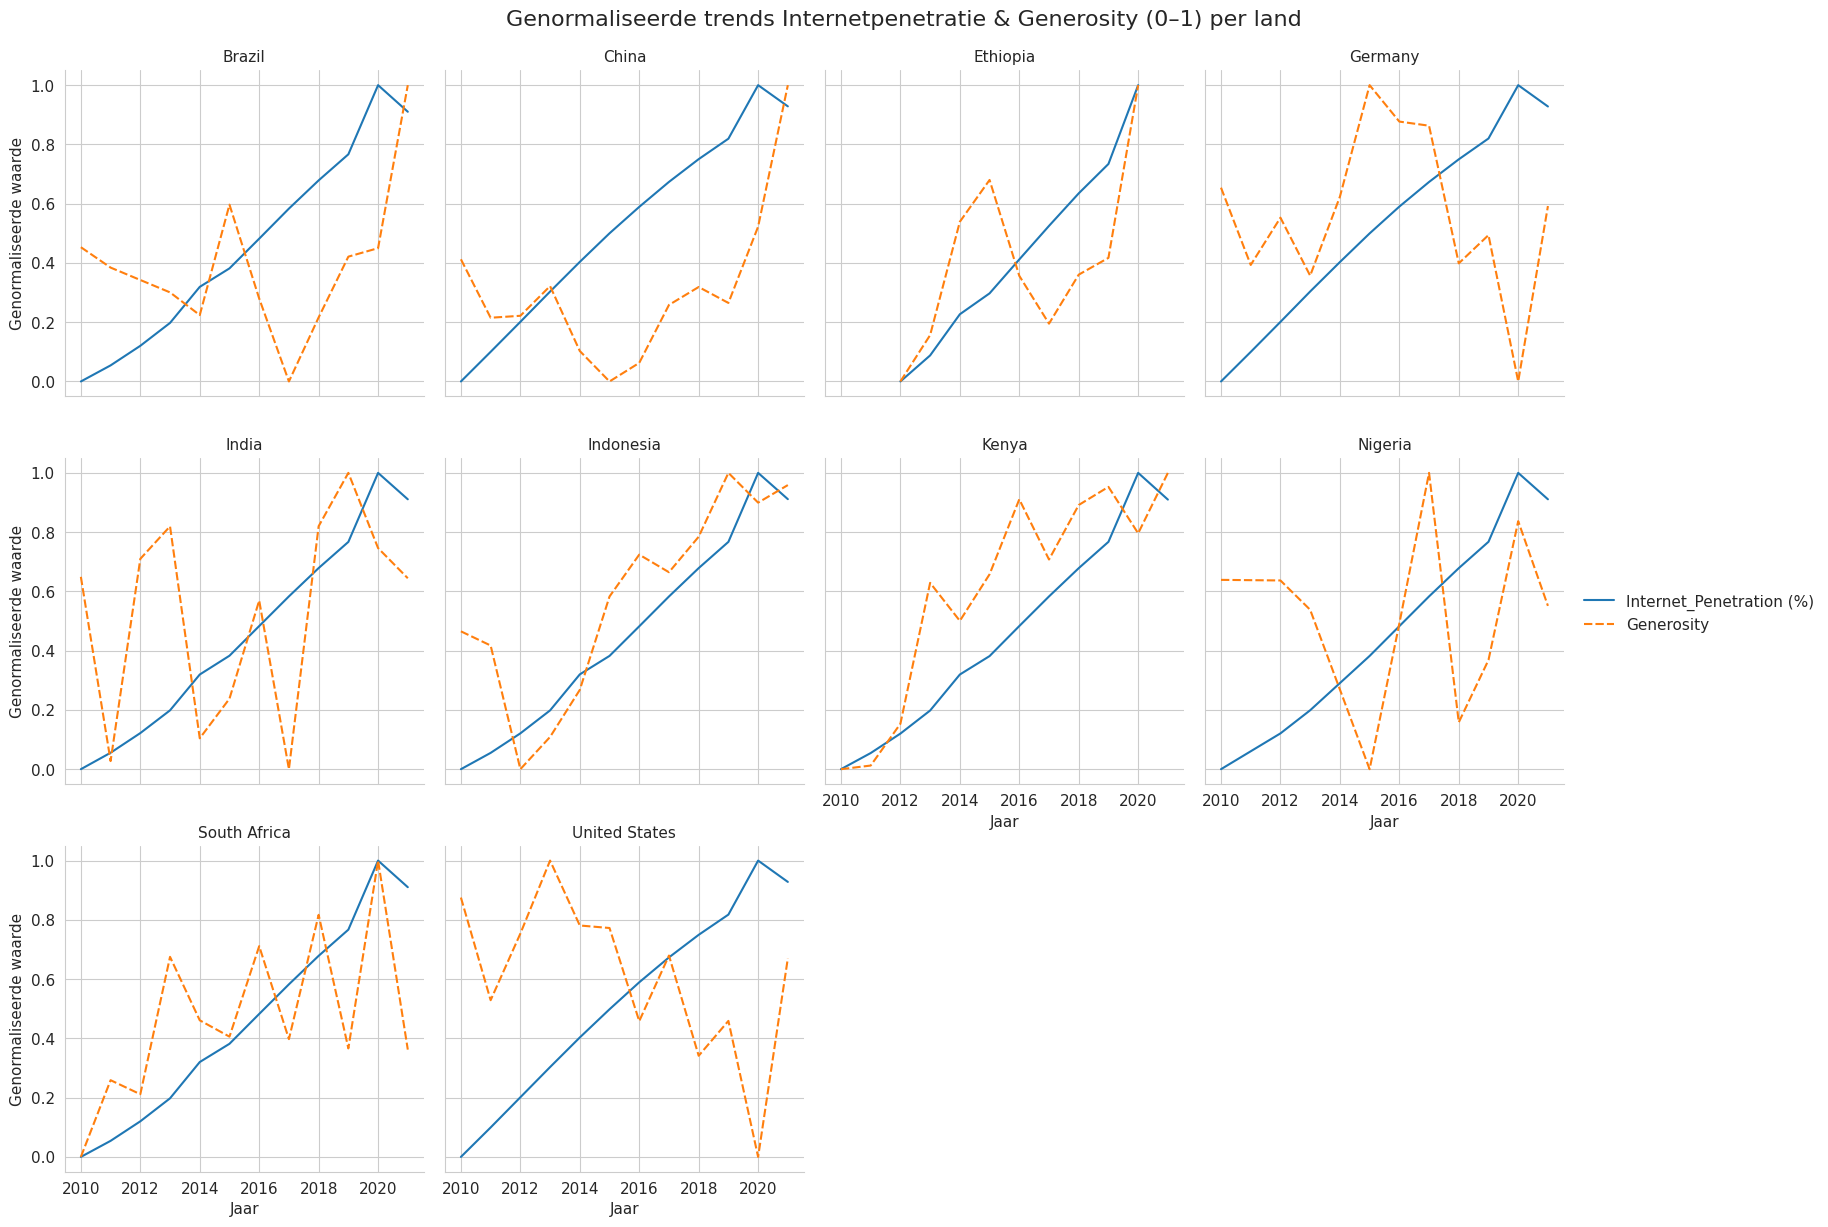

In [6]:
df = DATA["internet_generos"].copy()

valid_cty = df.groupby("Country").filter(lambda x: len(x) >= 5)
corr = valid_cty["Internet_Penetration (%)"].corr(valid_cty["Generosity"])
print(f"Correlatie wereldwijd: {corr:.3f}")

for col in ["Internet_Penetration (%)", "Generosity"]:
    valid_cty[col] = valid_cty.groupby("Country")[col] \
                     .transform(lambda s: (s - s.min()) / (s.max() - s.min()))

plot_df = valid_cty.melt(
    id_vars=["Country", "Year"],
    value_vars=["Internet_Penetration (%)", "Generosity"],
    var_name="Metric", value_name="NormValue"
)

g = sns.FacetGrid(plot_df, col="Country", col_wrap=4, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x="Year", y="NormValue", hue="Metric", style="Metric")
g.add_legend(); g.set_axis_labels("Jaar", "Genormaliseerde waarde"); g.set_titles("{col_name}")
g.fig.suptitle("Genormaliseerde trends Internetpenetratie & Generosity (0–1) per land",fontsize=16 , y=1.02)
plt.show()

> *Figuur 4: Scatterplot van internetpenetratie en generosity per land.*

Figuur 4 presenteert per land de genormaliseerde reeksen voor internetpenetratie en Generosity over de periode 2010-2021. In alle onderzochte landen vertoont de internetpenetratie een bijna lineaire toename die naar 2020 toe afvlakt. In sommige landen zoals China en Indonesia is de generosity wel degelijk gestegen, maar of dit door hogere internet penetratie komt is moeilijk te zeggen, aangezien landen zoals de Verenigde Staten en Duitsland juist een afnamen in  generosity mee maakte, terwijl ook hun internet penetratie bleef stijgen.

De correlatiecoëfficiënt is 0.033 en is dus verwaarloosbaar. Digitale verbondenheid versterkt onze netwerken dus niet automatisch, offline context en cultuur blijven dus voornamelijk bepalend.




## Perspectief 2: De keerzijde van digitalisering

Hoewel internet veel voordelen biedt, is het geen garantie voor meer geluk of economische stabiliteit. In dit perspectief wordt benadrukt dat internettoegang ook negatieve effecten met zich meebrengt, zoals toenemende ongelijkheid, mentale overbelasting en verstoring van lokale economieën.

### Argument 1: Digitale kloof vergroot ongelijkheid

Niet iedereen profiteert evenveel van digitalisering. In veel landen bestaat er een grote kloof tussen groepen die wél toegang hebben tot snel en betrouwbaar internet en groepen die dat niet hebben. Deze digitale ongelijkheid kan leiden tot grotere economische verschillen en uitsluiting van kansarme bevolkingsgroepen. Wanneer onderwijs, werk en overheidsdiensten steeds vaker digitaal worden aangeboden, vallen mensen zonder toegang buiten de boot. Dit zijn de nadelen van digitalisering in het onderwijs. Hoewel er voor diverse landen en bevolkingsgroepen vooral nadelen gelden, laat de grafiek zien dat over het algemeen de toegang tot internet samengaat met een gemiddeld hoger opleidingsniveau.

De clusteringscoëfficiënt voor tussen de variabelen internet penetratie en onderwijsniveau is erg hoog: 0.64. Dit betekent dat wanneer de toegang tot internet in een land stijgt, het onderwijsniveau tegelijkertijd vaak ook stijgt. Dit zou erop kunnen wijzen dat digitalisering in het onderwijs en buiten het onderwijs om zorgt voor hogere studieresultaten en een hoger gemiddeld opleidingsniveau. Dit is ook terug te zien in Figuur 5 waarbij er veel landen zijn waarvoor dit geld (Duitsland, India, Indonesië, Kenia, Zuid-Afrika en de Verenigde staten).

Correlatie Internetpenetratie ↔ Onderwijsniveau: 0.64


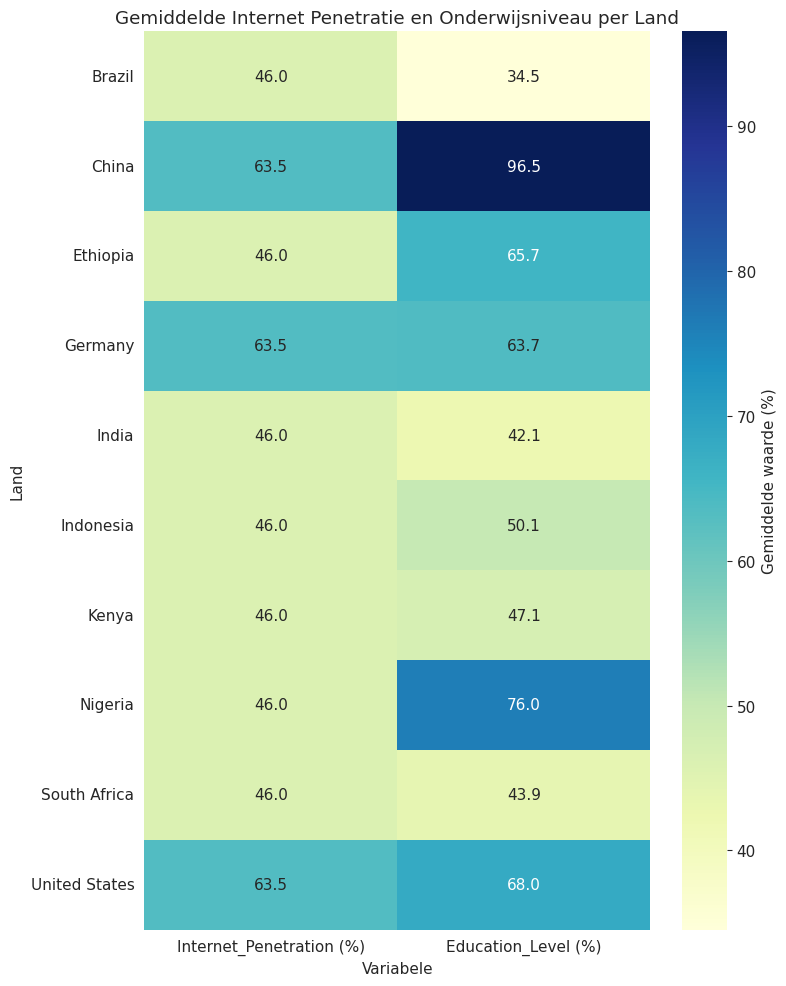

In [7]:
heatmap_data = DATA["internet_df"].groupby("Country")[
    ["Internet_Penetration (%)", "Education_Level (%)"]
].mean()

corr = heatmap_data["Internet_Penetration (%)"].corr(heatmap_data["Education_Level (%)"])
print(f"Correlatie Internetpenetratie ↔ Onderwijsniveau: {corr:.2f}")

plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu",
            cbar_kws={'label': 'Gemiddelde waarde (%)'})
plt.title("Gemiddelde Internet Penetratie en Onderwijsniveau per Land")
plt.ylabel("Land"); plt.xlabel("Variabele"); plt.tight_layout()
plt.show()

> *Figuur 5: Heatmap van internettoegang en gemiddeld opleidingsniveau per land.*

### Argument 2: Psychische en economische risico’s van internetgebruik


Naast ongelijkheid brengt internet ook psychologische en sociale risico’s met zich mee. Overmatig gebruik van digitale media wordt in verband gebracht met stress, burn-out en sociale isolatie. Tegelijkertijd komen problemen zoals desinformatie en online verschillen steeds vaker voor, wat het gevoel van vertrouwen in gevaar brengt.

Ook op economisch vlak zijn er nadelen. De opkomst van e-commerce en automatisering kan ten koste gaan van traditionele banen en lokale winkels, wat in sommige regio’s juist leidt tot hogere werkloosheid in plaats van vooruitgang. Hoewel veel mensen denken dat digitalisering zorgt voor meer werkloosheid, omdat machines of computers banen overnemen, laat Figuur 6 zien dat landen waar digitalisering snel gaat (zoals Brazilië en India) ongeveer evenveel werkloosheid hebben als landen waar het minder snel gaat (zoals China, Duitsland en de VS). Ook laat figuur 7 zien dat de gemiddelde werkloosheid niet samengaat met de gemiddelde internettoegang in een land. Dat betekent dat digitalisering niet per se hand in hand gaat met meer werkloosheid. Andere dingen, zoals onderwijs of regels van de overheid, zijn misschien belangrijker.

In [8]:
df = DATA["growth_unemp"].copy()

corr = df["Growth (%)"].corr(df["Unemployment Rate (%)"])
print(f"Correlatie digitale groei versus werkloosheid: {corr:.3f}")

threshold      = df["Growth (%)"].quantile(0.75)
fast_countries = sorted(df[df["Growth (%)"] >= threshold]["Country"].unique())
slow_countries = sorted(df[df["Growth (%)"] <  threshold]["Country"].unique())

fast_label = "Snelle digitale groei: " + ", ".join(fast_countries)
slow_label = "Lage tot gemiddelde groei: " + ", ".join(slow_countries)

df["Legend Label"] = np.where(df["Growth (%)"] >= threshold, fast_label, slow_label)

grouped_bar = (df.groupby("Legend Label", as_index=False)
                 ["Unemployment Rate (%)"].mean())

fig = px.bar(
    grouped_bar,
    x="Legend Label",
    y="Unemployment Rate (%)",
    color="Legend Label",
    title="Gemiddelde werkloosheid per groeigroep (2010–2023)",
    labels={
        "Unemployment Rate (%)": "Gemiddelde werkloosheid (%)",
        "Legend Label": "Digitale groeigroep + landen"
    },
    category_orders={"Legend Label": [slow_label, fast_label]},
)

fig.update_layout(xaxis_title="", showlegend=False)
fig.show()


Correlatie digitale groei versus werkloosheid: 0.136


> *Figuur 6: Vergelijking van werkloosheidscijfers in regio’s met snelle groei van digitale sectoren (gemiddelde ‘growth%’ per jaar tegen werkloosheid, landen met een gemiddelde ‘growth%’ van hoger dan 50% worden geclassificeerd als snel groeiend).*

In [9]:
growth = DATA["growth_unemp"][["Country", "Growth (%)"]].drop_duplicates()
thr    = growth["Growth (%)"].quantile(0.75)

fast_countries = sorted(growth[growth["Growth (%)"] >= thr]["Country"].unique())
slow_countries = sorted(growth[growth["Growth (%)"] <  thr]["Country"].unique())

fast_label = "Snelle digitale groei: " + ", ".join(fast_countries)
slow_label = "Lage tot gemiddelde groei: " + ", ".join(slow_countries)

unemp_yearly = (
    DATA["econ_df"]
    .query("2010 <= Year <= 2023")
    .groupby(["Country", "Year"])["Unemployment Rate (%)"]
    .mean()
    .reset_index()
)

merged = unemp_yearly.merge(growth, on="Country", how="inner")

corr_df = unemp_yearly.merge(growth, on="Country", how="left")
corr    = corr_df["Growth (%)"].corr(corr_df["Unemployment Rate (%)"])
print(f"Correlatie digitale groei versus werkloosheid: {corr:.3f}")

def label_groep(g):
    return fast_label if g >= thr else slow_label

merged["Legend Label"] = merged["Growth (%)"].apply(label_groep)

grouped = (
    merged.groupby(["Year", "Legend Label"], as_index=False)
          ["Unemployment Rate (%)"].mean()
)

fig = px.line(
    grouped,
    x="Year", y="Unemployment Rate (%)",
    color="Legend Label", markers=True,
    title="Werkloosheid per digitale groeigroep (2010–2023)",
    labels={
        "Unemployment Rate (%)": "Gemiddelde werkloosheid (%)",
        "Legend Label": "Digitale groeigroep + landen"
    },
    category_orders={"Legend Label": [slow_label, fast_label]},
)
fig.show()


Correlatie digitale groei versus werkloosheid: 0.099


> *Figuur 7: Vergelijking van werkloosheidscijfers in regio’s met snelle groei van digitale sectoren (gemiddelde ‘growth%’ per jaar tegen werkloosheid, landen met een gemiddelde ‘growth%’ van hoger dan 50% worden geclassificeerd als snel groeiend).*

## Reflection

Tijdens het werken aan deze opdracht hebben we veel geleerd over data-analyse en hoe belangrijk het is om kritisch te kijken naar de gegevens waarmee je werkt. In het begin dachten we dat we "gewoon" data konden downloaden en gebruiken, maar we kwamen er al snel achter dat dat niet altijd zo simpel is.

Een belangrijk moment in ons project was toen we merkten dat de dataset die we hadden gebruikt (Global Internet Adoption Trends van Kaggle) niet meer precies hetzelfde was als toen wij hem voor het eerst hadden gedownload. Sommige waarden leken veranderd of bijgewerkt. Dit maakte ons bewust van het feit dat datasets online soms worden aangepast of verbeterd en dat je dus goed moet documenteren wanneer je data hebt gedownload en welke versie je gebruikt. Dit hadden we in het begin niet allemaal gedaan en dat zorgde later voor verwarring toen we terug wilden kijken naar bepaalde resultaten.

Verder leerden we dat het belangrijk is om duidelijke grafieken en analyses te maken en niet te snel conclusies te trekken. Soms dachten we iets te zien in de data, maar als we beter keken of andere jaren erbij pakten, bleek het toch anders te liggen. Het samenwerken ging goed, al moesten we soms wel even afstemmen wie wat deed en hoe we de taken zouden verdelen.

Als we deze opdracht opnieuw zouden doen, zouden we vanaf het begin beter bijhouden waar onze data vandaan komt en welke versies we gebruiken. Ook zouden we misschien eerder kleine stukjes analyseren in plaats van meteen alles tegelijk te willen doen. Al met al zijn we trots op wat we hebben gemaakt, en we hebben er veel van geleerd.


##Conclusie
Sinds 2010 is de digitale wereld snel uitgebreid. Figuur 1.1 en 1.2 toonde hoe landen met een solide infrastructuur, denk aan Duitsland, de VS en in een snellere ontwikkelfase, China, zowel een hoge internetpenetratie als een respectabele bbp-groei combineren. De correlatiecoëfficiënt is matig (r ≈ 0,41), maar de spreiding laat zien dat een ruime online toegang vaak samengaat met kansen voor innovatie en productiviteit. Tegelijk zien we in landen als India en Brazilië dat lagere penetratie gepaard gaat met iets gematigder groei, wat het beeld geeft dat internet wel degelijk helpt als groei versneller, al blijft het verband niet causaal bewezen.

Analyse van de arbeidsmarkt in Figuur 2 toont een minder duidelijk patroon. De werkloosheid vertoont sterkere fluctuaties dan de constante groei van de  internetpenetratie. De correlatie van −0,23 suggereert dat een beter geïntegreerde economie op lange termijn iets lagere werkloosheid bereikt, maar schommelingen in economie en regionale crises beperken dit voordeel regelmatig. Internettoegang vormt dus geen goeie bescherming tegen elke economische tegenslag of crisis.

Voor welzijnsindicatoren is het beeld gemengd. Er bestaat slechts een zwakke positieve relatie tussen internettoegang en sociale steun (r = 0,14) en praktisch geen samenhang met 'Generosity' (r ≈ 0,03). Dit suggereert dat digitale verbondenheid op zichzelf niet automatisch leidt tot sterkere sociale netwerken of onbaatzuchtig gedrag. Culturele en institutionele factoren blijven hier waarschijnlijk doorslaggevend.

De resultaten rond onderwijs versterken het beeld dat internet vooral een ondersteunende rol speelt. De relatief hoge correlatie van r ≈ 0,64(Figuur 5) tussen internetpenetratie en opleidingsniveau wijst erop dat digitale infrastructuur de onderwijsmogelijkheden vergroot en zo het gemiddelde niveau kan verhogen.

Figuur 6 en 7 laten zien dat regio’s met de snelste digitale expansie niet per se gepaard gaan met hogere werkloosheid (correlaties:  r = 0,136 in Figuur 6 en r = 0,099 in Figuur 7). In regio’s waar internettoegang snel is toegenomen, blijven de werkloosheidscijfers gemiddeld vergelijkbaar met of zelfs lager dan die in landen met langzamere groei. Daarmee lijkt digitalisering vooral complementair aan arbeidsmarktstructuren in plaats van een directe bedreiging.

Samengevat ondersteunen de grafieken dat hogere internetpenetratie gepaard gaat met economische groei en voor betere scholing zorgt, maar het verband met welzijn blijft zwak en internet biedt geen garantie tegen economische schokken.

## Work Distribution

Voor dit project is het werk eerlijk verdeeld. De taken zijn zo verdeeld dat iedereen van een deel van het project wel iets meekrijgt. Hieronder staat de werkverdeling aangegeven:
Het project begon met het ontdekken van de datasets, het uitkiezen van 3 datasets en het kiezen van het onderwerp. Oliver, Sebastian en Stan hebben tijdens het eerste werkcollege 2 datasets uitgezocht (Internet adoption en World Happiness). We besloten deze met elkaar te vergelijken maar het was nog niet helemaal compleet. Daarom heeft Thijn de derde dataset gevonden die gaat over de economische factoren die we hebben meegenomen in het onderzoek. Vervolgens besloten we de introductie en de visualisaties te gaan maken. Stan heeft de figuren 3 en 5 gemaakt, Oliver heeft de figuren 4, 6 en 7 gemaakt en Sebastian heeft de figuren 1.1, 1.2 en 2 gemaakt.

Vervolgens heeft Thijn de introductie voor het project geschreven. Na de tussenbeoordeling die Thijn en Stan hebben bijgewoond, heeft Sebastian het template van een notebook opgesteld en besloten we daarin verder te gaan. Stan heeft de correlation coefficient voor iedere grafiek (waar dit van toepassing was) berekend, Thijn heeft de referenties geregeld en Oliver heeft de conclusie geschreven. Ook heeft iedereen bij zijn grafiek een korte beschrijving geschreven.

Door de beoordeling hebben Sebastian en Oliver de grafieken kunnen aanpassen naar de feedback uit de peerfeedback-les. Na een tussenevaluatie van onszelf besloten we het project af te maken. Thijn heeft perspectief 1 nagekeken en uitgebreid en de beschrijvingen van de datasets opgesteld, Stan heeft perspectief 2 nagekeken en uitgebreid en Oliver heeft de conclusie opgesteld. Uiteindelijk heeft Stan de work distribution geschreven, Oliver de preprocessing omgegooid en aangepast waardoor de code en het project overzichtelijker werden, heeft Thijn de introductie aangepast en de reflection geschreven en heeft Sebastian ervoor gezorgd dat alles in de repository terecht kwam en er een website van ons project gemaakt kon worden.
Kortom, het werk is omtrent tijd erg eerlijk verdeeld en iedereen heeft er evenveel tijd in gestoken om, volgens ons, een mooi eindproduct neer te kunnen zetten.




## Referenties

Centraal Bureau voor de Statistiek. (2023). More strikes but fewer strikers in 2022. Statistics Netherlands. https://www.cbs.nl/en-gb/news/2023/18/more-strikes-but-fewer-strikers-in-2022

Helliwell, J. F., Layard, R., Sachs, J., & De Neve, J.-E. (2021). World Happiness Report 2021. Sustainable Development Solutions Network. https://worldhappiness.report

Islam, J. (2023). World Happiness Report 2005–2021 [Dataset]. Kaggle. https://www.kaggle.com/datasets/jahaidulislam/world-happiness-report-2005-2021

Mirhajisadati, H. (2023). Global Economic Indicators Dataset 2010–2023 [Dataset]. Kaggle. https://www.kaggle.com/datasets/heidarmirhajisadati/global-economic-indicators-dataset-2010-2023

Sudip, D. (2023). Global Internet Adoption Trends (2010–2025) [Dataset]. Kaggle. https://www.kaggle.com/datasets/sudipde25/global-internet-adoption-trends

World Bank. (2023). Individuals using the internet (% of population). https://data.worldbank.org/indicator/IT.NET.USER.ZS